Visualize a subset of the OCT dataset provided by [tia16].

### References

[tia16]  Tian et al. "Performance evaluation of automated segmentation software on optical coherence tomography volume data," J. Biophotonics, 2016.   http://onlinelibrary.wiley.com/doi/10.1002/jbio.201500239/full

In [101]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import h5py

import numpy as np
import pylab as plt
from scipy.io import loadmat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
def render_slice(x, y, layer_ids, layer_names):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'tan'] * 2
    layers = []
    
    height = float(x.shape[0])
    width = float(x.shape[1])
    
    fig = plt.figure(figsize=(8,8))

    plt.imshow(x, interpolation='none', cmap='bone')
    for ii in range(y.shape[0]):
        if np.all(y[ii,:] > 0):
            plt.plot(np.arange(y.shape[1]), y[ii,:], colors[ii])
            layers.append(layer_ids[ii]) # numbering convention in [tia16] is 1-based
    
    plt.xlim([0, width]); plt.ylim([height,0])
    plt.axis('off')
    
    lstr = [ '%d : %s' % (x, layer_names[x]) for x in layers]
    plt.legend(lstr, loc='lower right')

X:  (496, 768, 50) uint8 0 255
Y:  (9, 768, 50) float64
[ 100.  100.  100.    6.  100.   18.    2.  100.    0.]
[ 100.  100.  100.    0.  100.    0.    0.  100.    0.]


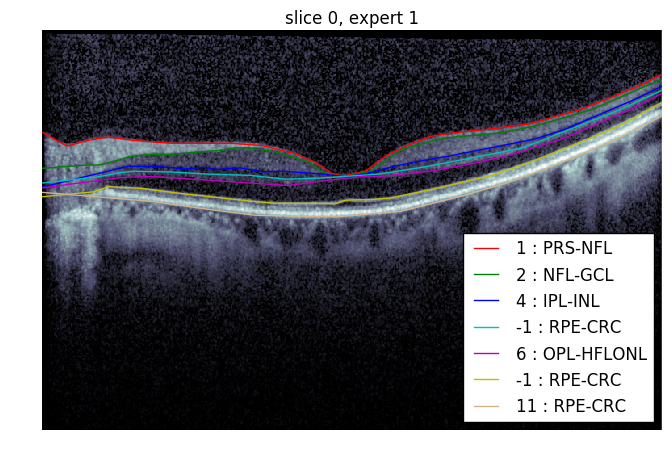

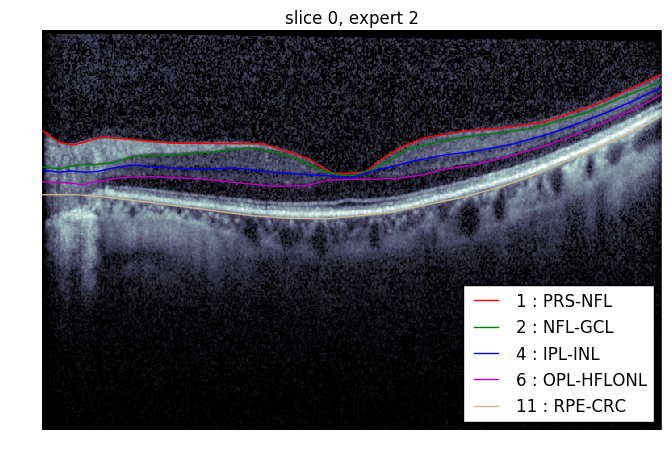

In [126]:
mat_file = '/Users/pekalmj1/Data/Tian_OCT/jbio201500239-sup-0003-Data-S1.mat'

mf = loadmat(mat_file)
X = mf['volumedata']
Y1 = mf['O1']
Y2 = mf['O2']

# See Table 2 and  section 2.5.3 in [tia16].
# Note the authors start counting at 1 and in python we start at 0.
layer_ids = [1, 2, 4, -1, 6, -1, -1, 11, -1] 
layer_names = ['n/a', # there is no layer 0
               'PRS-NFL', 'NFL-GCL', 'GCL-IPL', 'IPL-INL', 'INL-OPL',
               'OPL-HFLONL', 'HFLONL-ELMMYZ', 'ELMMYZ-ELZOS',
               'ELZOS-IDZ', 'IDZ-RPE', 'RPE-CRC']
plot_slice = lambda x, y: render_slice(x,y,layer_ids,layer_names)


print('X: ', X.shape, X.dtype, np.min(X), np.max(X))
print('Y: ', Y1.shape, Y1.dtype)

pct_labeled_1 = 100. * np.sum(np.sum((Y1!=0),axis=2),axis=1) / Y1.shape[-1] / Y1.shape[-2]
pct_labeled_2 = 100. * np.sum(np.sum((Y2!=0),axis=2),axis=1) / Y2.shape[-1] / Y2.shape[-2]
print(pct_labeled_1)
print(pct_labeled_2)


s = 0
plot_slice(X[:,:,0], Y1[:,:,s])
plt.title('slice %d, expert 1' % s)
plt.show()

plot_slice(X[:,:,0], Y2[:,:,s])
plt.title('slice %d, expert 2' % s)
plt.show()